# 均值滤波

In [1]:
import numpy as np
import imageio as imgio
import scipy as sci
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage.interpolation import zoom

In [2]:
# 引入二维卷积函数
def convolve_all_colours(im, window):
    """
    用窗口window卷积图像，依次对图像的每个通道卷积
    """
    ims = []
    # 用ims作为每个通道转换结果的暂存列表
    for d in range(3):
    # 对图像的三个通道循环处理
        im_conv_d = convolve2d(im[:,:,d], window, mode="same", boundary="symm")
        # mode决定输出尺寸，boundary决定边界条件，这里输出尺寸与原图相同，采用对称边界条件
        ims.append(im_conv_d)
        # 将单通道转换结果添加到列表

    im_conv = np.stack(ims, axis=2)
    im_conv = np.clip(im_conv,0,255)
    im_conv = np.uint8(im_conv)
    # 在第三维上堆叠ims列表中的每个元素，并通过astype保证值在0-255
    return im_conv

In [4]:
def mean_filter(im,wsize = 3):
    imf = np.float32(im)
    window = np.ones((wsize,wsize)).astype(np.float32)
    window /= np.sum(window)
    dst = convolve_all_colours(imf,window)
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [5]:
im = imgio.imread('../datas/f3.jpg')
dst = mean_filter(im,11)

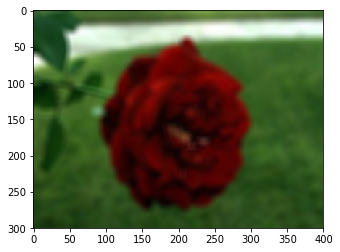

In [6]:
plt.imshow(dst)